In [3]:
# install required libraries
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


**step 1: Load and explore data**

In [71]:
#load and explore data
# Load disbursement data
disb_df = pd.read_csv('Forecast disbursement growth.csv', names=["date", "disbursed_amount"], parse_dates=["date"])


disb_df.info()
disb_df.head() 
disb_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              224 non-null    datetime64[ns]
 1   disbursed_amount  224 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.6 KB


,date,disbursed_amount
219,2024-08-07,2917900.0
220,2024-08-08,3502680.0
221,2024-08-09,2562530.0
222,2024-08-10,3529440.0
223,2024-08-11,2142760.0


In [72]:
print(disb_df.columns)


Index(['date', 'disbursed_amount'], dtype='object')


In [74]:
# checking missing values
disb_df.isnull().sum()
disb_df.dtypes

date                datetime64[ns]
disbursed_amount           float64
dtype: object

In [75]:
disb_df['date'] = pd.to_datetime(disb_df['date'])

In [84]:
disb_df.dtypes
print(disb_df)

          date  disbursed_amount
0   2024-01-01         1706020.0
1   2024-01-02         2679550.0
2   2024-01-03         1942460.0
3   2024-01-04         3192670.0
4   2024-01-05         2533095.0
..         ...               ...
219 2024-08-07         2917900.0
220 2024-08-08         3502680.0
221 2024-08-09         2562530.0
222 2024-08-10         3529440.0
223 2024-08-11         2142760.0

[224 rows x 2 columns]


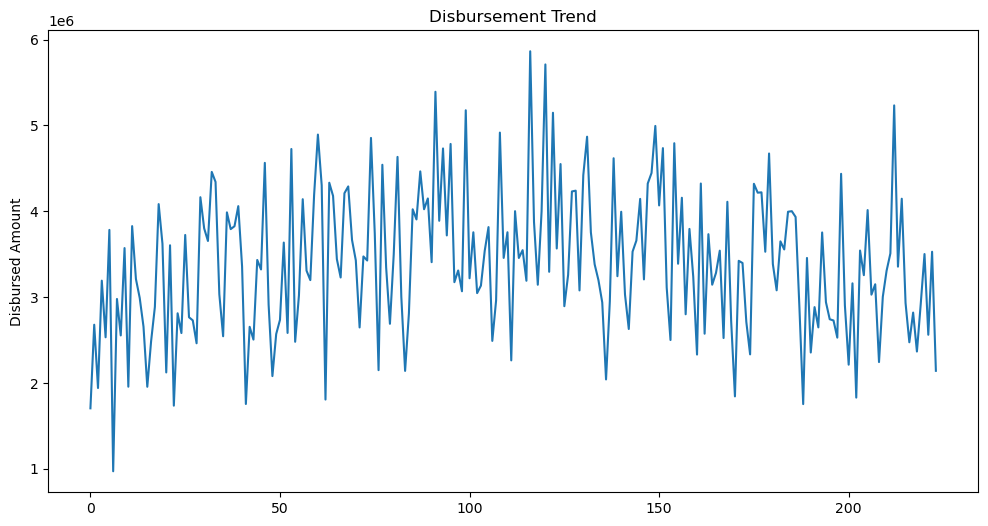

In [78]:
disb_df['disbursed_amount'].plot(figsize=(12,6), title='Disbursement Trend')
plt.ylabel('Disbursed Amount')
plt.show()


In [79]:
#load and explore data
# Load repayments data
repay_df = pd.read_csv('Forecast repayment cashflows.csv', names=["date", "repaid_amount"], parse_dates=["date"])


repay_df.info()
repay_df.head() 
repay_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           208 non-null    datetime64[ns]
 1   repaid_amount  208 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


,date,repaid_amount
203,2024-08-22,1061817.27
204,2024-08-23,1473542.42
205,2024-08-24,1571539.92
206,2024-08-25,961639.35
207,2024-08-26,1614147.11


In [82]:
# checking missing values
repay_df.isnull().sum()

date             0
repaid_amount    0
dtype: int64

In [83]:
repay_df.dtypes
print(repay_df)

          date  repaid_amount
0   2024-01-01      589039.69
1   2024-01-02     1309196.97
2   2024-01-03     1095221.54
3   2024-01-04     1103317.05
4   2024-01-05     1196610.71
..         ...            ...
203 2024-08-22     1061817.27
204 2024-08-23     1473542.42
205 2024-08-24     1571539.92
206 2024-08-25      961639.35
207 2024-08-26     1614147.11

[208 rows x 2 columns]


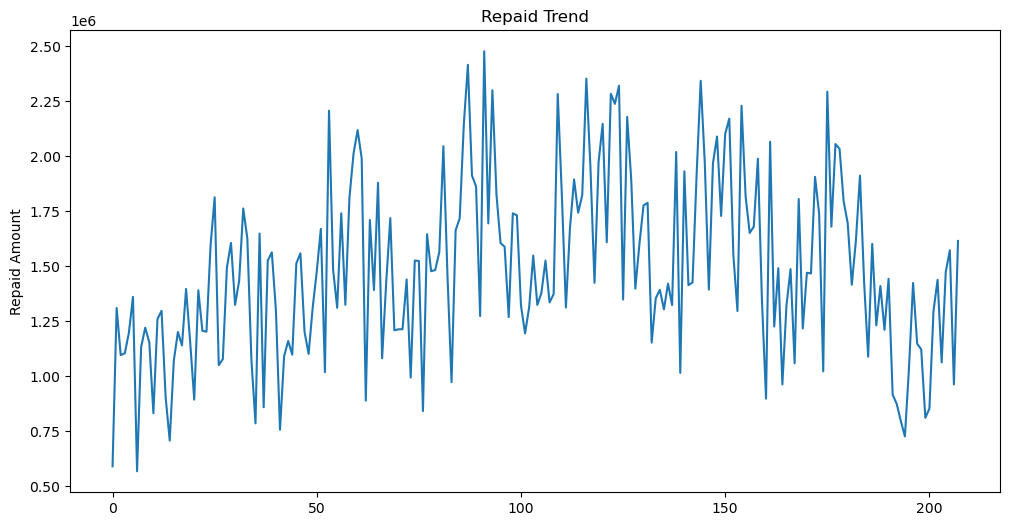

In [85]:
repay_df['repaid_amount'].plot(figsize=(12,6), title='Repaid Trend')
plt.ylabel('Repaid Amount')
plt.show()

In [86]:
# Rename date columns (if needed)
print(disb_df)
print(repay_df)

          date  disbursed_amount
0   2024-01-01         1706020.0
1   2024-01-02         2679550.0
2   2024-01-03         1942460.0
3   2024-01-04         3192670.0
4   2024-01-05         2533095.0
..         ...               ...
219 2024-08-07         2917900.0
220 2024-08-08         3502680.0
221 2024-08-09         2562530.0
222 2024-08-10         3529440.0
223 2024-08-11         2142760.0

[224 rows x 2 columns]
          date  repaid_amount
0   2024-01-01      589039.69
1   2024-01-02     1309196.97
2   2024-01-03     1095221.54
3   2024-01-04     1103317.05
4   2024-01-05     1196610.71
..         ...            ...
203 2024-08-22     1061817.27
204 2024-08-23     1473542.42
205 2024-08-24     1571539.92
206 2024-08-25      961639.35
207 2024-08-26     1614147.11

[208 rows x 2 columns]


In [87]:
#Truncate to Month
disb_df['month'] = disb_df['date'].dt.to_period('M').dt.to_timestamp()
repay_df['month'] = repay_df['date'].dt.to_period('M').dt.to_timestamp()


In [88]:
#Group by Month and Sum
monthly_disb = disb_df.groupby('month')['disbursed_amount'].sum().reset_index()
monthly_repay = repay_df.groupby('month')['repaid_amount'].sum().reset_index()



In [89]:
#Merge Monthly Data
monthly_combined = pd.merge(monthly_disb, monthly_repay, on='month', how='outer')
monthly_combined = monthly_combined.sort_values(by='month')


✅ **Profit / Loss = Repayment - Disbursement**

In [90]:
monthly_combined['profit_loss'] = monthly_combined['repaid_amount'] - monthly_combined['disbursed_amount']


In [91]:
print(monthly_combined)


       month  disbursed_amount  repaid_amount  profit_loss
0 2024-01-01        88111245.0    36324334.95 -51786910.05
1 2024-02-01        96894769.0    40403520.99 -56491248.01
2 2024-03-01       112728976.0    47778996.83 -64949979.17
3 2024-04-01       114410927.0    50932577.77 -63478349.23
4 2024-05-01       116461427.0    53848444.58 -62612982.42
5 2024-06-01       101227232.0    47639731.04 -53587500.96
6 2024-07-01        98670105.0            NaN          NaN
7 2024-08-01        32754212.0    32053565.65   -700646.35


In [99]:
#Prepare the Data for Forecasting
from statsmodels.tsa.arima.model import ARIMA

# Use profit_loss for forecasting
ts = monthly_combined['profit_loss']

# Check for NaNs (fill with 0 or drop if you want)
ts = ts.fillna(0)  # or ts.dropna()



In [100]:
# Define ARIMA order (p,d,q) - here (1,1,1) is a simple start, you can tune it
model = ARIMA(ts, order=(1,1,1))

# Fit the model
model_fit = model.fit()

print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:            profit_loss   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -128.711
Date:                Wed, 21 May 2025   AIC                            263.423
Time:                        04:40:47   BIC                            263.260
Sample:                    01-01-2024   HQIC                           261.417
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3637     20.449      0.018      0.986     -39.716      40.443
ma.L1         -0.2372     20.715     -0.011      0.991     -40.837      40.363
sigma2      9.612e+14   3.33e-13   2.88e+27      0.0

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [101]:
# Forecast 3 future steps (months)
forecast = model_fit.forecast(steps=3)

print("3-Month Forecast:")
print(forecast)


3-Month Forecast:
2024-09-01    8.832107e+05
2024-10-01    1.459193e+06
2024-11-01    1.668654e+06
Freq: MS, Name: predicted_mean, dtype: float64


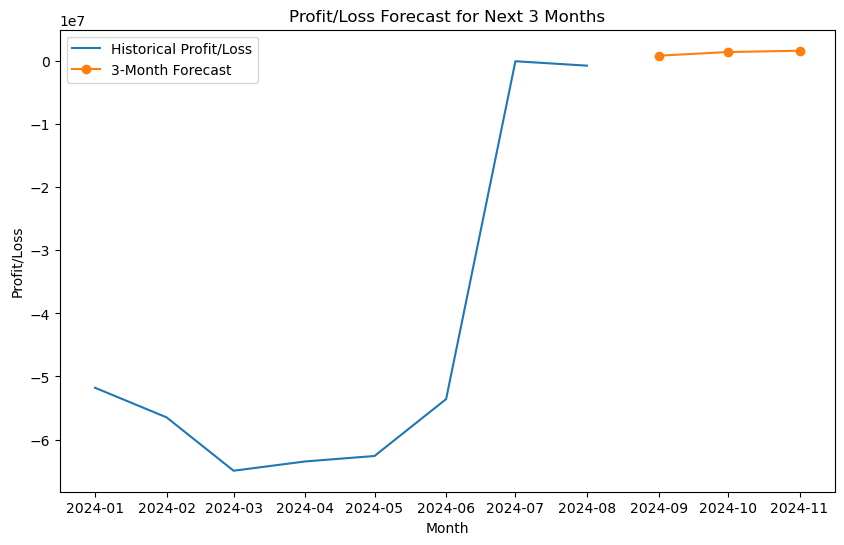

In [102]:
plt.figure(figsize=(10,6))
plt.plot(ts, label='Historical Profit/Loss')
plt.plot(forecast.index, forecast, label='3-Month Forecast', marker='o')
plt.title('Profit/Loss Forecast for Next 3 Months')
plt.xlabel('Month')
plt.ylabel('Profit/Loss')
plt.legend()
plt.show()


# Insights from the Loan Disbursement and Repayment Profit/Loss Forecast Data 

## Historical Trend (Jan 2024 - Nov 2024)
- The Profit/Loss values, calculated as disbursed amounts minus repayments, are consistently negative, indicating more disbursements than repayments).
- No clear upward/downward trend, but fluctuations suggest seasonality or irregular loan cycles.

## 3-Month Forecast (Unseen Future)
- The forecast continues the negative trend, implying that repayments are expected to remain lower than disbursements.
- If this trend holds, the loan portfolio may experience ongoing negative cash flow in the short term.

## Potential Issues
Persistent negative profit/loss in loan cash flows may indicate:
- High volume of new loans disbursed relative to repayments received.
- Possible delays or defaults in repayments.
- Inefficiencies in loan recovery processes.
- Lack of a positive trend reversal suggests corrective actions on collections or credit risk management might be insufficient.

## Recommendations for Improvement

1. **Investigate Causes of Negative Cash Flow**  
   - Analyze loan portfolio quality to identify overdue or non-performing loans.  
   - Review repayment schedules and delinquency rates to find bottlenecks.  
   - Assess if disbursement growth is outpacing the capacity to collect repayments.

2. **Adjust Forecasting Model**  
   - Current ARIMA model may not fully capture external factors like economic cycles or policy changes.  
   - Consider using Prophet for better seasonality and holiday effects modeling.  
   - Explore machine learning models (XGBoost, LSTM) if more features (borrower behavior, economic indicators) are available.

3. **Scenario Analysis**  
   - Simulate impacts of improved repayment rates:  
     - "What if repayment collections improve by 10%?"  
     - "What if loan disbursement growth slows by 15%?"  
   - Use Monte Carlo simulations to assess portfolio risk and variability.

4. **Short-Term Actions**  
   - Strengthen loan recovery and collections strategies.  
   - Reassess credit underwriting policies to reduce high-risk disbursements.  
   - Optimize loan product offerings to balance growth and repayment capacity.

5. **Improve Data Granularity and Features**  
   - Use weekly or daily repayment and disbursement data if available for finer insights.  
   - Integrate external data such as economic trends, borrower credit scores, or competior activity into forecasting models.

---

This approach will help the loan management team better understand cash flow dynamics, anticipate risk, and make data-driven decisions to improve loan portfolio health.
idays, competitor activity) to the model.
